# Simple Linear Regression
By Yaohang Li

In [1]:
import numpy as np
%matplotlib notebook
import matplotlib.pyplot as plt
import pandas as pd

## Read data set from kaggle

In [2]:
df_train = pd.read_csv('train.csv')
df_test = pd.read_csv('test.csv')

x_train = df_train['x']
y_train = df_train['y']
x_test = df_test['x']
y_test = df_test['y']

x_train = np.array(x_train)
y_train = np.array(y_train)
x_test = np.array(x_test)
y_test = np.array(y_test)

## Visualize the data

<IPython.core.display.Javascript object>


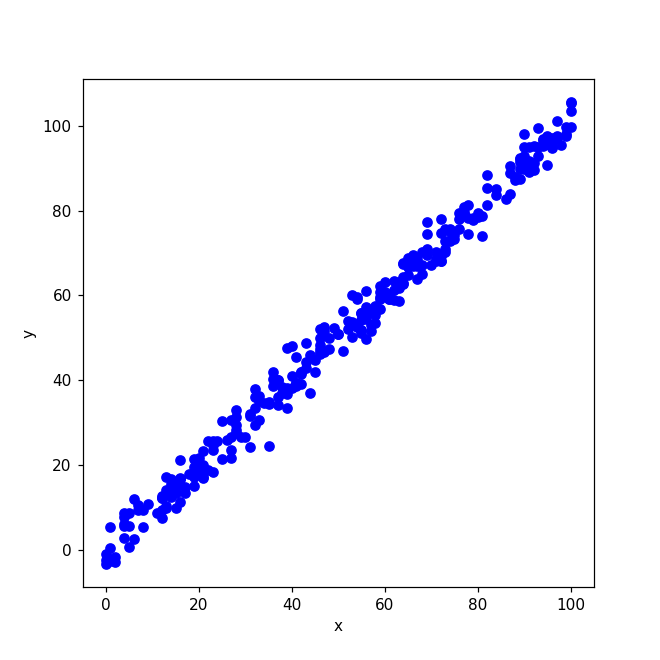

In [3]:
plt.figure(figsize=(6,6))
plt.scatter(x_test,y_test,color='blue',label='GT')
plt.xlabel("x")
plt.ylabel("y")
plt.show()

## Initialize parameters

In [26]:
alpha = 0.0001

w_0 = 0
w_1 = 0

## Build linear regression model
$y=w_0+w_1x$

<IPython.core.display.Javascript object>


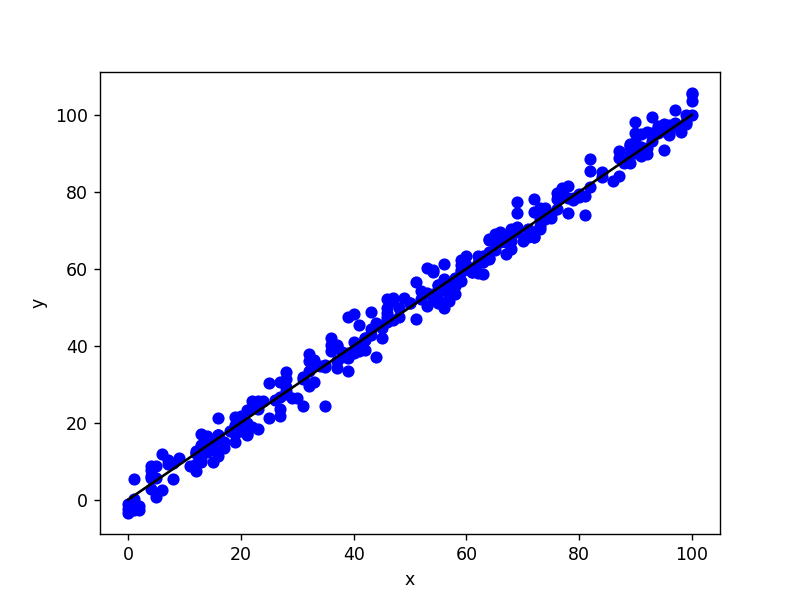

In [27]:
fig = plt.figure()
ax = fig.add_subplot(111)
plt.ion()
plt.scatter(x_test,y_test,color='blue',label='GT')
plt.xlabel("x")
plt.ylabel("y")
fig.show()
fig.canvas.draw()

n = len(y_train)
epochs = 0
while(epochs < 1000):
    y = w_0 + w_1 * x_train
    error = y - y_train
    mse = np.sum(error**2)/n
    w_0 = w_0 - alpha * 2 * np.sum(error)/n 
    w_1 = w_1 - alpha * 2 * np.sum(error * x_train)/n
    epochs += 1
    if epochs%10 == 0:
        x_plot = np.linspace(0,100,100)
        y_plot = w_0 + w_1*x_plot
        ax.clear()
        ax.scatter(x_test,y_test,color='blue',label='GT')
        ax.plot(x_plot,y_plot,color='black',label = 'pred')
        plt.xlabel("x")
        plt.ylabel("y")
        fig.canvas.draw()

## Print model parameters

In [28]:
w_0, w_1

(0.008911096339194879, 0.9990147371656249)

In [29]:
mse

7.874201636547555

## Sensitivity of the learning rate
Reset the learning rate alpha to 0.00001

In [ ]:
alpha = 0.001

w_0 = 0
w_1 = 0

## Rerun the running process

In [ ]:
fig = plt.figure()
ax = fig.add_subplot(111)
plt.ion()
plt.scatter(x_test,y_test,color='blue',label='GT')
plt.xlabel("x")
plt.ylabel("y")
fig.show()
fig.canvas.draw()

n = len(y_train)
epochs = 0
while(epochs < 1000):
    y = w_0 + w_1 * x_train
    error = y - y_train
    mse = np.sum(error**2)/n
    w_0 = w_0 - alpha * 2 * np.sum(error)/n 
    w_1 = w_1 - alpha * 2 * np.sum(error * x_train)/n
    epochs += 1
    if epochs%10 == 0:
        x_plot = np.linspace(0,100,100)
        y_plot = w_0 + w_1*x_plot
        ax.clear()
        ax.scatter(x_test,y_test,color='blue',label='GT')
        ax.plot(x_plot,y_plot,color='black',label = 'pred')
        plt.xlabel("x")
        plt.ylabel("y")
        fig.canvas.draw()

## Linear Regression using sklearn
Scikit-learn is a free software machine learning library for the Python programming language. It features various classification, regression and clustering algorithms.

In [30]:
from sklearn import linear_model
from sklearn.metrics import mean_squared_error

In [35]:
x_train = x_train.reshape(-1,1)
x_test = x_test.reshape(-1,1)

## Define a linear regression model

In [36]:
lm = linear_model.LinearRegression()

## Train the linear regression model

In [37]:
model = lm.fit(x_train,y_train)

## Prediction

In [38]:
prediction = lm.predict(x_test)
prediction = prediction.reshape(-1,1)

## Calculate Training MSE

In [39]:
mean_squared_error(prediction, y_test)

9.427051961750598

## Show $R^2$ Score

In [40]:
lm.score(x_train, y_train)

0.9906954632401117

## Print model parameters

In [41]:
lm.intercept_, lm.coef_

(-0.10894745670402983, array([1.00078012]))